In [ ]:
import pandas as pd 

filepath = "Results Analysis.xlsx"
sheet_names = "treated_results"

df = pd.read_excel(filepath, sheet_name=sheet_names)

df

In [11]:
def discretize_quality_value(quality_value):
    if quality_value < 57:
        return 'low'
    elif 47 <= quality_value <= 68:
        return 'medium'
    else:
        return 'high'

# Apply the function to create a new column 'quality_class'
df['quality_class'] = df['quality_value'].apply(discretize_quality_value)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Prepare the feature matrix (X) and target vector (y)
X = df.drop(columns=['patient_number', 'quality_value', 'quality_class'])
y = df['quality_class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

print("Random Forest Classifier Results:")
print(classification_report(y_test, rf_y_pred))

# Support Vector Machine Classifier
svm_clf = SVC(kernel='linear', C=1, random_state=42)
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)

print("SVM Classifier Results:")
print(classification_report(y_test, svm_y_pred))


Random Forest Classifier Results:
              precision    recall  f1-score   support

        high       0.50      0.80      0.62         5
         low       0.33      0.40      0.36         5
      medium       0.25      0.12      0.17         8

    accuracy                           0.39        18
   macro avg       0.36      0.44      0.38        18
weighted avg       0.34      0.39      0.35        18

SVM Classifier Results:
              precision    recall  f1-score   support

        high       0.33      0.60      0.43         5
         low       0.00      0.00      0.00         5
      medium       0.00      0.00      0.00         8

    accuracy                           0.17        18
   macro avg       0.11      0.20      0.14        18
weighted avg       0.09      0.17      0.12        18



In [16]:
#trying this without discretizing it. 

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Prepare the feature matrix (X) and target vector (y)
X = df.drop(columns=['patient_number', 'quality_value'])
y = df['quality_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Regressor
rf_regr = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regr.fit(X_train, y_train)
rf_y_pred = rf_regr.predict(X_test)

print("Random Forest Regressor Results:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, rf_y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, rf_y_pred))

# Support Vector Regression
svr = SVR(kernel='linear', C=1)
svr.fit(X_train, y_train)
svr_y_pred = svr.predict(X_test)

print("Support Vector Regression Results:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, svr_y_pred))


Random Forest Regressor Results:
Mean squared error: 62.11
Coefficient of determination (R^2): 0.04
Support Vector Regression Results:
Mean squared error: 142.76
Coefficient of determination (R^2): -1.20


Random Forest Regressor Results:
Mean squared error: 62.11
Mean absolute error: 6.11
Coefficient of determination (R^2): 0.04


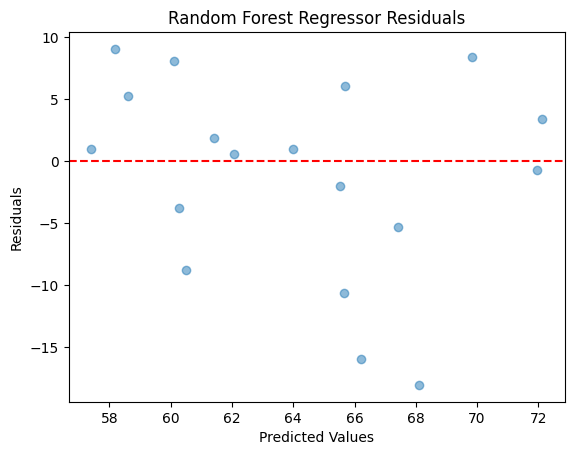

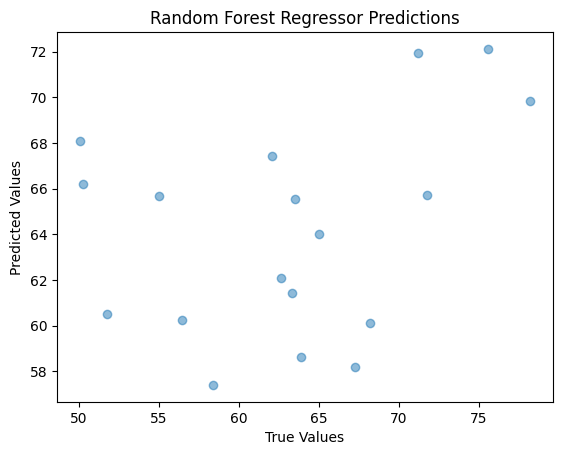

Support Vector Regression Results:
Mean squared error: 142.76
Mean absolute error: 9.88
Coefficient of determination (R^2): -1.20


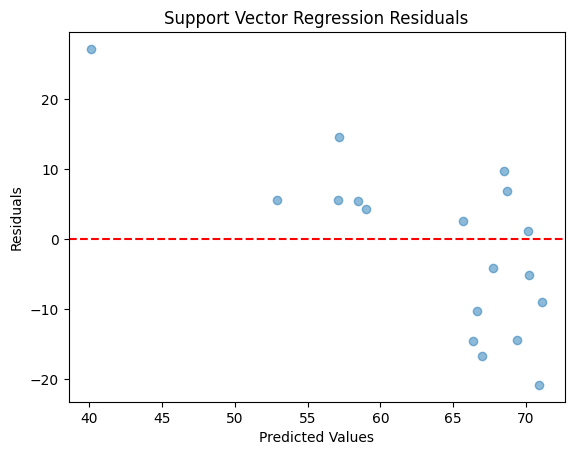

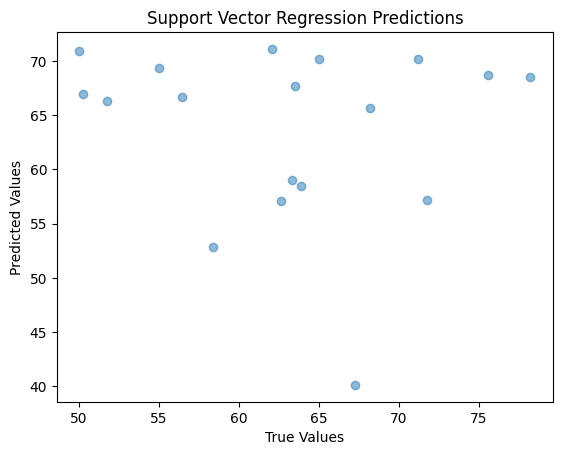

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def plot_residuals(y_true, y_pred, title):
    residuals = y_true - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(title + ' Residuals')
    plt.show()

def plot_predictions(y_true, y_pred, title):
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title(title + ' Predictions')
    plt.show()

# Random Forest Regressor
print("Random Forest Regressor Results:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, rf_y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, rf_y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, rf_y_pred))
plot_residuals(y_test, rf_y_pred, 'Random Forest Regressor')
plot_predictions(y_test, rf_y_pred, 'Random Forest Regressor')

# Support Vector Regression
print("Support Vector Regression Results:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, svr_y_pred))
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, svr_y_pred))
print("Coefficient of determination (R^2): %.2f" % r2_score(y_test, svr_y_pred))
plot_residuals(y_test, svr_y_pred, 'Support Vector Regression')
plot_predictions(y_test, svr_y_pred, 'Support Vector Regression')
